In [1]:
import pythonradex

# # import necessary modules
from pythonradex import radiative_transfer, helpers, LAMDA_file, atomic_transition
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
# pyhonradex needs a file containing the atomic data, import it, this is a specific file for CO from LAMBDA database
datafilepath = r"C:\Users\alios\OneDrive - University College London\Desktop\UCL\Year3\group project\codes\co_datafile.dat"  # file downloaded from LAMDA database


# define the geometry of the nebula
geometry = "uniform sphere"

# define the parameters of the nebula
line_profile_type = "Gaussian"  # line profile, can be "Gaussian",  “rectangular”,"LVG sphere", "LVG slab”
width_v = 5 * constants.kilo  # line width in m/s, costants.kilo is 1 km/s

cloud = radiative_transfer.Cloud(
    datafilepath=datafilepath,
    geometry=geometry,
    line_profile_type=line_profile_type,
    width_v=width_v,
)

N = 1e18 / constants.centi**2  # CO column density in m-2
Tkin = 30  # kinetic temperature in [K]

# collider densities in cm-3:
para_h2_density = 1e8
ortho_h2_density = 3e8

# collider densities in m-3 (phytonradex takes the densities in m-3):
collider_densities_LTE = {
    "para-H2": para_h2_density / constants.centi**3,
    "ortho-H2": ortho_h2_density / constants.centi**3,
}

# define the background radiation field, in this case we assume that the background is zero, z is the redshift
ext_background = helpers.generate_CMB_background(z=0)

# no dust:
T_dust = 0
tau_dust = 0

# use high colliders density to simulate LTE
cloud.update_parameters(
    N=N,
    Tkin=Tkin,
    collider_densities=collider_densities_LTE,
    ext_background=ext_background,
    T_dust=T_dust,
    tau_dust=tau_dust,
)

# solve the radiative trasfer equation, i.e. calculate the level population with an iterative method
cloud.solve_radiative_transfer()

In [3]:
# store the data
data_co = LAMDA_file.read(datafilepath, read_frequencies=True)

# Initialize g_weigth
levels = data_co["levels"]
rad_transitions = data_co["radiative transitions"]
coll_transitions = data_co["collisional transitions"]
quantum_numbers = data_co["quantum numbers"]

g_weigth = np.array([level.g for level in levels])
g_up = np.array([gup.name for gup in rad_transitions])

In [4]:
number_level = np.array([level.number for level in levels])

In [5]:
Eu = np.array([level.E for level in levels]) / constants.k

Eu_test = np.array([level.up.E for level in rad_transitions]) / constants.k

In [6]:
Eu

array([   0.        ,    5.53214517,   16.59617609,   33.19188137,
         55.31833031,   82.974736  ,  116.16031175,  154.87340764,
        199.11280441,  248.87685379,  304.16332873,  364.97043585,
        431.29580629,  503.13678297,  580.49056589,  663.35449669,
        751.72520052,  845.599158  ,  944.97313597, 1049.84303913,
       1160.20491752, 1276.0546769 , 1397.3877882 , 1524.19972692,
       1656.48539072, 1794.2399659 , 1937.45806361, 2086.1342947 ,
       2240.26298185, 2399.83801775, 2564.8534387 , 2735.3029919 ,
       2911.18013782, 3092.47804981, 3279.18990371, 3471.30844029,
       3668.82625666, 3871.73609478, 4080.02983772, 4293.69964515,
       4512.73740391])

In [7]:
Eu_test

array([   5.53214517,   16.59617609,   33.19188137,   55.31833031,
         82.974736  ,  116.16031175,  154.87340764,  199.11280441,
        248.87685379,  304.16332873,  364.97043585,  431.29580629,
        503.13678297,  580.49056589,  663.35449669,  751.72520052,
        845.599158  ,  944.97313597, 1049.84303913, 1160.20491752,
       1276.0546769 , 1397.3877882 , 1524.19972692, 1656.48539072,
       1794.2399659 , 1937.45806361, 2086.1342947 , 2240.26298185,
       2399.83801775, 2564.8534387 , 2735.3029919 , 2911.18013782,
       3092.47804981, 3279.18990371, 3471.30844029, 3668.82625666,
       3871.73609478, 4080.02983772, 4293.69964515, 4512.73740391])

In [8]:
for i, tran in enumerate(rad_transitions):
    gu = tran.up.g
    Eu = tran.up.E
    print(f"Transition {i}:")
    print("Statistical weight of upper level ", gu)
    print("Energy of upper level Eu", Eu / constants.k)
    print()

print("statsitical weight of upper level ", gu)
print("Energy of upper level Eu", Eu / constants.k)

Transition 0:
Statistical weight of upper level  3.0
Energy of upper level Eu 5.532145167854433

Transition 1:
Statistical weight of upper level  5.0
Energy of upper level Eu 16.596176090653508

Transition 2:
Statistical weight of upper level  7.0
Energy of upper level Eu 33.19188137466572

Transition 3:
Statistical weight of upper level  9.0
Energy of upper level Eu 55.31833030822088

Transition 4:
Statistical weight of upper level  11.0
Energy of upper level Eu 82.97473600266304

Transition 5:
Statistical weight of upper level  13.0
Energy of upper level Eu 116.16031175493842

Transition 6:
Statistical weight of upper level  15.0
Energy of upper level Eu 154.8734076419077

Transition 7:
Statistical weight of upper level  17.0
Energy of upper level Eu 199.11280441095295

Transition 8:
Statistical weight of upper level  19.0
Energy of upper level Eu 248.8768537863343

Transition 9:
Statistical weight of upper level  21.0
Energy of upper level Eu 304.1633287284865

Transition 10:
Statis

In [9]:
g_up[0]

np.str_('1-0')

In [10]:
def extract_upper_number(np_str):
    return int(np_str.split("-")[0])


# Example usage
first_number = extract_upper_number(g_up[0])

print(first_number)  # Output: 1

1


In [11]:
g_weigth

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
       27., 29., 31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.,
       53., 55., 57., 59., 61., 63., 65., 67., 69., 71., 73., 75., 77.,
       79., 81.])

# Testing methanol 

In [12]:
# pyhonradex needs a file containing the atomic data, import it, this is a specific file for CO from LAMBDA database
datafilepath = (
    r"C:\Users\alios\OneDrive - University College London\Desktop\UCL\Year3\group project\codes\e_ch3oh.dat"  # file downloaded from LAMDA database
)


# define the geometry of the nebula
geometry = "uniform sphere"

# define the parameters of the nebula
line_profile_type = "Gaussian"  # line profile, can be "Gaussian",  “rectangular”,"LVG sphere", "LVG slab”
width_v = 5 * constants.kilo  # line width in m/s, costants.kilo is 1 km/s

cloud = radiative_transfer.Cloud(
    datafilepath=datafilepath,
    geometry=geometry,
    line_profile_type=line_profile_type,
    width_v=width_v,
)

N = 1e18 / constants.centi**2  # CO column density in m-2
Tkin = 50  # kinetic temperature in [K]

# collider densities in cm-3:
para_h2_density = 1e8
ortho_h2_density = 3e8

# collider densities in m-3 (phytonradex takes the densities in m-3):
LTE_collider_densities_h2only = {"H2": 1e6 / constants.centi**3}

# define the background radiation field, in this case we assume that the background is zero, z is the redshift
ext_background = helpers.generate_CMB_background(z=0)

# no dust:
T_dust = 0
tau_dust = 0

# use high colliders density to simulate LTE
cloud.update_parameters(
    N=N,
    Tkin=Tkin,
    collider_densities=LTE_collider_densities_h2only,
    ext_background=ext_background,
    T_dust=T_dust,
    tau_dust=tau_dust,
)

# solve the radiative trasfer equation, i.e. calculate the level population with an iterative method
cloud.solve_radiative_transfer()

79-78: tau_nu0 = -6.71
96-95: tau_nu0 = -0.301
46-45: tau_nu0 = -16.5
28-27: tau_nu0 = -0.00165
26-24: tau_nu0 = -0.00074
91-89: tau_nu0 = -0.0134
13-12: tau_nu0 = -20.2
18-17: tau_nu0 = -23.7
10-8: tau_nu0 = -11.2
23-22: tau_nu0 = -23.2
30-27: tau_nu0 = -21
37-36: tau_nu0 = -17.2
44-43: tau_nu0 = -13
54-53: tau_nu0 = -8.71
65-64: tau_nu0 = -5.36
49-48: tau_nu0 = -1.27e-10
79-77: tau_nu0 = -2.46
92-91: tau_nu0 = -1.34
105-104: tau_nu0 = -0.298
121-120: tau_nu0 = -0.544
14-12: tau_nu0 = -2.63
68-66: tau_nu0 = -0.00325
9-7: tau_nu0 = -35.9
38-37: tau_nu0 = -0.0102
12-11: tau_nu0 = -3.12e-06
10-7: tau_nu0 = -1.24e-05
92-89: tau_nu0 = -4
110-109: tau_nu0 = -0.105
59-56: tau_nu0 = -11.9
38-36: tau_nu0 = -0.00163
13-11: tau_nu0 = -9.69e-07
33-31: tau_nu0 = -0.000609
104-103: tau_nu0 = -0.00701
58-55: tau_nu0 = -3.34e-10
137-136: tau_nu0 = -0.000547
80-78: tau_nu0 = -0.00423
16-14: tau_nu0 = -25.2
46-44: tau_nu0 = -0.0112
105-103: tau_nu0 = -1.78
125-122: tau_nu0 = -0.0259
69-68: tau_nu0 = -8

c:\Users\alios\AppData\Local\Programs\Python\Python312\Lib\site-packages\pythonradex\radiative_transfer.py:110: UserWarning: some lines are overlapping, but treatement of overlapping lines not activated
  warnings.warn('some lines are overlapping, but treatement of'
c:\Users\alios\AppData\Local\Programs\Python\Python312\Lib\site-packages\pythonradex\radiative_transfer.py:333: UserWarning: negative optical depth!
  warnings.warn('negative optical depth!')


In [13]:
# store the data
data = LAMDA_file.read(datafilepath, read_frequencies=False, read_quantum_numbers=True)

# Initialize g_weigth
levels = data["levels"]
rad_transitions = data["radiative transitions"]
coll_transitions = data["collisional transitions"]
quantum_numbers = data["quantum numbers"]


In [14]:
# selected_quantum_numbers_with_indices = [(i, qn) for i, qn in enumerate(quantum_numbers) if qn.split("_")[1] == "1"]
# indices = [i for i, qn in selected_quantum_numbers_with_indices]
# print(indices)

In [ ]:
class MyClass:
    def __init__(self, cloud_name, data_of_molecule, column_density_species, width_v, Tkin):
        """
        Initialize the class with the cloud object, the data of the molecule, the column density of the species, the width of the line and the kinetic temperature.

        Parameters
        ----------
        cloud_name : pythonradex.Cloud
            The cloud object.
        data_of_molecule : dict
            The data of the molecule.
        column_density_species : float
            The column density of the species in m^2.
        width_v : float
            The width of the line in m/s
        Tkin : float
            The kinetic temperature in [K].
        """
        self.cloud_name = cloud_name
        self.data_of_molecule = data_of_molecule
        self.column_density_species = column_density_species
        self.width_v = width_v
        self.Tkin = Tkin
        self.extract_and_calculate()  # this allows optical_depth to use the extracted values from the extract_and_calculate method

    def get_transition_populations(self, names_transitions):
        """
        Relates all the transitions in names_transitions with their corresponding population densities.

        Parameters
        ----------
        names_transitions: (list of str):
            List of transitions in the format ['79-78', '14-13', ...], where each element is a string with the format "upper_level-lower_level".

        Returns
        -------
            tuple: Two arrays, one for upper and one for lower populations density.
        """
        upper_populations = []
        lower_populations = []
        self.upper_level_transition_index = []
        for transition in names_transitions:
            upper_level, lower_level = map(int, transition.split("-"))  # split the string and convert to integers
            upper_pop = self.cloud_name.level_pop[upper_level]
            lower_pop = self.cloud_name.level_pop[lower_level]
            upper_populations.append(upper_pop)
            lower_populations.append(lower_pop)
            self.upper_level_transition_index.append(upper_level)

        nu = np.array(upper_populations)
        nl = np.array(lower_populations)
        # compute upper level population density, given by: fractional population density x total column density
        Nu = nu * self.column_density_species
        Nl = nl * self.column_density_species
        return Nu, Nl

    def extract_and_calculate(self, debug=False):
        """
        Extract values from the cloud object and the data file, and calculate gamma factor

        Parameters
        ----------
        debug : boolean, optional
            If True, print debugging information. Default is False.

        Returns
        --------
        Tex: np.array
            The excitation temperature of the molecule.
        tau: np.array
            The optical depth of the transitions.
        Aul : np.array
            The Einstein coefficient for spontaneous emission [s^-1].
        Bul : np.array
            The Einstein coefficient for stimulated emission in [sr m2 Hz / Jy].
        nu0_array : np.array
            The rest frequency of the transition in Hz.
        Eu : np.array
            The energy of the upper level in [K].
        gu : np.array
            The statistical weight of the upper level.
        gamma: np.array
            Gamma factors, which is calculated using: gamma = (8 * np.pi * k * nu0**2) / (h * c**3 * Aul)
        Nu: np.array
            Upper level population density in [m-2].
        Nl: np.array
            Lower level population density in [m-2].
        FWHM_each_transition: np.array
            Frequency width of each transition in [Hz].
        """
        # Extract values
        self.Tex = self.cloud_name.Tex
        self.Aul = self.cloud_name.emitting_molecule.A21
        self.Bul = self.cloud_name.emitting_molecule.B21
        self.nu0_array = self.cloud_name.emitting_molecule.nu0
        self.tau = self.cloud_name.tau_nu(self.nu0_array)

        # levels = self.data_of_molecule["levels"]
        rad_transitions = self.data_of_molecule["radiative transitions"]

        # Extract upper energy levels in [J] and convert to Kelvin
        self.Eu = np.array([transition.up.E for transition in rad_transitions]) / constants.k

        # Get the statistical weight of the upper and lower levels
        self.gu = np.array([transition.up.g for transition in rad_transitions])
        self.glow = np.array([transition.low.g for transition in rad_transitions])

        # Get names of transitions
        names_transitions = np.array([tran.name for tran in rad_transitions])

        # Compute upper and lower level population densities
        self.Nu, self.Nl = self.get_transition_populations(names_transitions)

        # Convert velocity width to frequency width
        self.FWHM_each_transition = self.nu0_array * (self.width_v / constants.c)

        # Calculate gamma factor
        self.gamma = (8 * np.pi * constants.k * self.nu0_array**2) / (constants.h * constants.c**3 * self.Aul)

        if debug:
            # Debugging print statements
            print("Size of nu0_array:", len(self.nu0_array))
            print("Size of Eu:", len(self.Eu))
            print("E upper levels:", self.Eu)
            print("Size of gu:", len(self.gu))
            print("size exitation temperature Tex:", len(self.Tex))
            print(" gu:", self.gu)
            print("Size of glow:", len(self.glow))
            print(" glow:", self.glow)
            print("size Aul:", len(self.Aul))
            print("size FWHM_each_transition:", len(self.FWHM_each_transition))
            print("size gamma:", len(self.gamma))
            print("size Nu:", len(self.Nu))
            print("size Nl:", len(self.Nl))

        return (
            self.Tex,
            self.tau,
            self.Aul,
            self.Bul,
            self.nu0_array,
            self.Eu,
            self.gu,
            self.glow,
            self.gamma,
            self.Nu,
            self.Nl,
            self.FWHM_each_transition,
        )

    def get_selected_variables(self, k_quantum_number):
        """
        Returns the variables in extract_and_calculate which have indices selected by the given k_quantum_number.

        Parameters
        ----------
        k_quantum_number : str
            The k quantum number to filter the quantum numbers.

        Returns
        -------
        dict
            Dictionary containing the selected variables.
        """
        # expanetion of the line below:
        # enumerate(self.upper_level_transition_index): returns the index and the value of the upper level radiative transition index
        # self.data_of_molecule["quantum numbers"][upper_transition]: condition that filters the elements, it cheks if the k quantum number (index 1) is equal to the given k quantum number
        # i is the index in the radiative transitions for which the above if true
        indices = [
            i
            for i, upper_transition in enumerate(self.upper_level_transition_index)
            if self.data_of_molecule["quantum numbers"][upper_transition].split("_")[1] == k_quantum_number
        ]
        print("Indices of the transitions that have the selected k quantum number", indices)
        # selected all the variable that have the specified k quantum number
        selected_vars = {
            "Tex": self.Tex[indices],
            "tau": self.tau[indices],
            "Aul": self.Aul[indices],
            "Bul": self.Bul[indices],
            "nu0_array": self.nu0_array[indices],
            "Eu": self.Eu[indices],
            "gu": self.gu[indices],
            "glow": self.glow[indices],
            "gamma": self.gamma[indices],
            "Nu": self.Nu[indices],
            "Nl": self.Nl[indices],
            "FWHM_each_transition": self.FWHM_each_transition[indices],
        }
        return selected_vars

    def optical_depth(self):
        """
        Calculate the optical depth of a transition using the different approaches.
        In both method the change of optical depth over the line profile is not taken into account

        Returns
        -------
        tau_with_correction_factor : np.array
              Optical depth computed with the correction factor for gaussian line profile function.
        tau_without_correction_factor : np.array
              Optical depth computed without the correction factor for gaussian line profile function.
        """
        # Ensure extract_and_calculate has been called,
        if not hasattr(self, "Tex"):  # checks if the instance variable Tex has already been set, returns True if the object already has an attribute.
            self.extract_and_calculate()

        conversion_factor = np.sqrt(np.pi) / (2 * np.sqrt(np.log(2)))  ## approx. 1.0645
        # Equation used in RADEX, with correction factor for gaussian line profile function
        tau_with_correction_factor = (
            (constants.c**2 / (8 * np.pi * self.nu0_array**2))
            * self.Aul
            * ((self.Nl * self.gu / self.glow) - self.Nu)
            / (conversion_factor * self.FWHM_each_transition)
        )
        # Equation used in RADEX, without correction factor for gaussian line profile function
        tau_without_correction_factor = (
            (constants.c**2 / (8 * np.pi * self.nu0_array**2)) * self.Aul * ((self.Nl * self.gu / self.glow) - self.Nu) / self.FWHM_each_transition
        )

        return tau_with_correction_factor, tau_without_correction_factor

In [16]:
# selected_quantum_numbers_with_indices = [
#             (i, qn) for i, qn in enumerate(self.data_of_molecule["quantum numbers"]) if qn.split("_")[1] == k_quantum_number
#         ]
#         self.indices = [i for i, qn in selected_quantum_numbers_with_indices]
#         print("Indices of the transitions that have the selected k quantum number", self.indices)


In [17]:
# Get names of transitions
names_transitions = np.array([tran.name for tran in rad_transitions])
upper_transitions = []
lower_transitions = []

for transition in names_transitions:
    upper_level, lower_level = map(int, transition.split("-"))  # split the string and convert to integers
    upper_transitions.append(upper_level)
    lower_transitions.append(lower_level)

print("index upper tran", upper_transitions[:10])
print("index lower tran", lower_transitions[:10])

index upper tran [79, 14, 96, 30, 46, 5, 132, 28, 58, 8]
index lower tran [78, 13, 95, 28, 45, 4, 131, 27, 56, 7]


In [18]:
selected_quantum_numbers_with_indices = [(i, qn) for i, qn in enumerate(quantum_numbers) if qn.split("_")[1] == "1"]
indices = [i for i, qn in selected_quantum_numbers_with_indices]
print(indices)

[6, 8, 12, 17, 22, 27, 36, 43, 53, 64, 77, 91, 104, 120, 135]


In [19]:
names_transitions

array(['79-78', '14-13', '96-95', ..., '227-190', '241-218', '255-248'],
      dtype='<U7')

In [20]:
# Get names of transitions
names_transitions = np.array([tran.name for tran in rad_transitions])
upper_level_transition_index = []

for transition in names_transitions:
    upper_level, lower_level = map(int, transition.split("-"))  # split the string and convert to integers
    upper_level_transition_index.append(upper_level)

# Check if the quantum number of the upper transition is equal to 1
selected_indices_in_radiative_tran = [
    i for i, upper_transition in enumerate(upper_level_transition_index) if quantum_numbers[upper_transition].split("_")[1] == "1"
]

print(selected_indices_in_radiative_tran)


[9, 14, 33, 39, 52, 58, 77, 83, 87, 117, 119, 125, 131, 138, 165, 166, 168, 169, 170, 171, 174, 175, 176, 178, 179, 180, 182, 186, 187, 188, 190, 195, 197, 212, 235, 238, 244, 251, 261, 275, 278, 304, 319, 331, 346, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 366, 369, 370, 372, 373, 389, 413, 417, 430, 446, 458, 460, 467, 482, 502, 528, 531, 537, 543, 562, 574, 577, 583, 601, 635, 650, 652, 671, 675, 699, 713, 714, 720, 724, 749, 762, 765, 771, 800, 813, 816, 822, 861, 880, 898, 928, 936, 979, 984, 1040, 1041, 1062, 1092, 1139]


In [21]:
# extract the data from the cloud object and the data file
CH3OH_instance = MyClass(cloud, data, N, width_v, Tkin)

TexCH3OH, tauCH3OH, AulCH3OH, BulCH3OH, nu0_arrayCH3OH, EuCH3OH, gCH3OH, glow_CH3OH, gammaCH3OH, NuCH3OH, NlCH3OH, FWHMCH3OH = (
    CH3OH_instance.extract_and_calculate(debug=True)
)

# calculate the optical depth of a transition using the different approaches
tau_radex_CH3OH, tau_pythonRADEX_approx_CH3OH = CH3OH_instance.optical_depth()

Size of nu0_array: 2324
Size of Eu: 2324
E upper levels: [ 175.52646272   36.33487126  215.89566435 ...  788.06989178  972.79157753
 1405.59868271]
Size of gu: 2324
size exitation temperature Tex: 2324
 gu: [23.  9. 23. ... 31. 29. 31.]
Size of glow: 2324
 glow: [21.  7. 21. ... 29. 31. 31.]
size Aul: 2324
size FWHM_each_transition: 2324
size gamma: 2324
size Nu: 2324
size Nl: 2324


In [26]:
# get values for specific k quantum number
data_k0 = CH3OH_instance.get_selected_variables("0")
data_k1 = CH3OH_instance.get_selected_variables("1")
data_k2 = CH3OH_instance.get_selected_variables("4")


Indices of the transitions that have the selected k quantum number [1, 5, 12, 30, 42, 43, 49, 55, 71, 86, 88, 108, 114, 123, 134, 139, 140, 143, 145, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 173, 185, 207, 216, 232, 241, 255, 264, 268, 271, 285, 310, 311, 326, 328, 348, 374, 379, 401, 405, 415, 429, 434, 450, 453, 456, 477, 488, 503, 511, 517, 538, 547, 569, 571, 582, 613, 642, 643, 679, 706, 725, 756, 774, 807, 829, 869, 919, 942, 1004]
Indices of the transitions that have the selected k quantum number [9, 14, 33, 39, 52, 58, 77, 83, 87, 117, 119, 125, 131, 138, 165, 166, 168, 169, 170, 171, 174, 175, 176, 178, 179, 180, 182, 186, 187, 188, 190, 195, 197, 212, 235, 238, 244, 251, 261, 275, 278, 304, 319, 331, 346, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 366, 369, 370, 372, 373, 389, 413, 417, 430, 446, 458, 460, 467, 482, 502, 528, 531, 537, 543, 562, 574, 577, 583, 601, 635, 650, 652, 671, 675, 699, 713, 714, 720, 724, 749, 762, 765, 771, 800, 813, 8

In [27]:
data_k0["Tex"]

array([   2.2099573 ,    2.83407808,  -11.48947262,  -49.73037496,
         43.4749022 ,   21.431256  ,   11.63203659,  -52.54700572,
        283.74515571,   47.88160697,   34.46447149,   18.07835482,
       -134.56407723,  150.24913888,   50.14238697,   38.97498626,
          7.72035614,   11.87506821,   15.12220958,   18.23165503,
         20.23403615,   21.67017096,   22.52823007,   23.14577886,
         23.79965746,   23.31897685,   22.14925517,   22.01384343,
         22.03941424,   21.87824399,   21.77054767, -250.97052345,
         99.03390157,   50.09204944,   43.04234171, -331.55337705,
         86.05940949,   50.63997212,   46.52696683,   27.74180736,
       -344.06082825,   80.62708982,   49.50993313,   53.25291492,
         29.88507519, -529.75583797,   76.53345763,   50.85403401,
         49.50006267,  827.30334142,   31.73664345,   71.75187388,
         50.01174314,   49.98694741,   92.3784016 ,   33.4799751 ,
         63.0690897 ,   42.72306195,   49.82998123,   35.95861

In [28]:
data_k0["Eu"]

array([ 36.33487126,  20.08964154,  61.85014041,  36.33487126,
        15.44670856,  47.93429045,  15.44670856,  78.07666603,
        47.93429045,  20.08964154,  61.85014041,  13.12452268,
        96.61386732,  61.85014041,  27.05332163,  78.07666603,
       290.74083752, 256.13825362, 223.81900862, 193.78741885,
       166.04780066, 140.60303158, 117.45742795,  96.61386732,
        78.07666603,  61.85014041,  47.93429045,  36.33487126,
        15.44670856,  27.05332163,  20.08964154, 117.45742795,
        78.07666603,  36.33487126,  96.61386732, 140.60303158,
        96.61386732,  47.93429045, 117.45742795,  20.08964154,
       166.04780066, 117.45742795, 140.60303158,  61.85014041,
        27.05332163, 193.78741885, 140.60303158, 166.04780066,
        78.07666603, 223.81900862,  36.33487126, 166.04780066,
       193.78741885,  96.61386732, 256.13825362,  47.93429045,
       193.78741885, 223.81900862, 117.45742795, 290.74083752,
        61.85014041, 223.81900862, 256.13825362, 140.60

<>:40: SyntaxWarning: invalid escape sequence '\c'
<>:64: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
<>:40: SyntaxWarning: invalid escape sequence '\c'
<>:64: SyntaxWarning: invalid escape sequence '\c'
<>:88: SyntaxWarning: invalid escape sequence '\c'
C:\Users\alios\AppData\Local\Temp\ipykernel_31680\677621752.py:40: SyntaxWarning: invalid escape sequence '\c'
  label=(f"Fit K=0: $T_{{ex}}$ = {T_ex_k0:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k0:.5g}"),
C:\Users\alios\AppData\Local\Temp\ipykernel_31680\677621752.py:64: SyntaxWarning: invalid escape sequence '\c'
  label=(f"Fit K=1: $T_{{ex}}$ = {T_ex_k1:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k1:.5g}"),
C:\Users\alios\AppData\Local\Temp\ipykernel_31680\677621752.py:88: SyntaxWarning: invalid escape sequence '\c'
  label=(f"Fit K=2: $T_{{ex}}$ = {T_ex_k2:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k2:.5g}"),


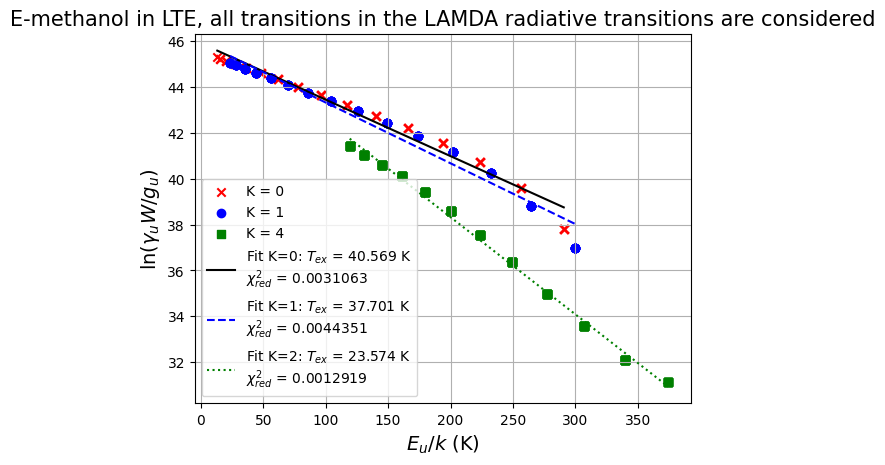

In [29]:
# Take only N first transitions
firstN_transitions = 100

# calculate get y values using column density of the upper level
y_values_metanol_k0 = np.log(data_k0["Nu"] / data_k0["gu"])
y_values_metanol_k1 = np.log(data_k1["Nu"] / data_k1["gu"])
y_values_metanol_k2 = np.log(data_k2["Nu"] / data_k2["gu"])

# plot population diagram
fig, ax = plt.subplots()
plt.scatter(data_k0["Eu"], y_values_metanol_k0, marker="x", color="red", label="K = 0")
plt.scatter(data_k1["Eu"], y_values_metanol_k1, marker="o", color="blue", label="K = 1")
plt.scatter(data_k2["Eu"], y_values_metanol_k2, marker="s", color="green", label="K = 4")

plt.xlabel(r"$E_u/k$ (K)", fontsize=14)
plt.ylabel(r"$\ln(\gamma_u W / g_u)$", fontsize=14)
plt.title("E-methanol in LTE, all transitions in the LAMDA radiative transitions are considered", fontsize=15)

# Fit a straight line to estimate T_ex for K=0
fit_k0 = np.polyfit(data_k0["Eu"], y_values_metanol_k0, 1)  # Linear fit
T_ex_k0 = -1 / fit_k0[0]  # Rotational temperature from slope

# Calculate the fitted y-values for K=0
x_fit_k0 = np.linspace(min(data_k0["Eu"]), max(data_k0["Eu"]), 100)
y_fit_k0 = fit_k0[0] * x_fit_k0 + fit_k0[1]

# Calculate chi-squared for K=0
y_fit_observed_k0 = fit_k0[0] * data_k0["Eu"] + fit_k0[1]
chi_squared_k0 = np.sum(((y_values_metanol_k0 - y_fit_observed_k0) ** 2) / y_fit_observed_k0)

# reduced chi_squared: chi_squared / (num_point - num_parameters), num_parameters = 1 for a straight line
chi_squared_red_k0 = chi_squared_k0 / (len(data_k0["Eu"]) - 2)

# Plot the best-fit line for K=0
plt.plot(
    x_fit_k0,
    y_fit_k0,
    linestyle="-",
    color="black",
    label=(f"Fit K=0: $T_{{ex}}$ = {T_ex_k0:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k0:.5g}"),
)

# Fit a straight line to estimate T_ex for K=1
fit_k1 = np.polyfit(data_k1["Eu"], y_values_metanol_k1, 1)  # Linear fit
T_ex_k1 = -1 / fit_k1[0]  # Rotational temperature from slope

# Calculate the fitted y-values for K=1
x_fit_k1 = np.linspace(min(data_k1["Eu"]), max(data_k1["Eu"]), 100)
y_fit_k1 = fit_k1[0] * x_fit_k1 + fit_k1[1]

# Calculate chi-squared for K=1
y_fit_observed_k1 = fit_k1[0] * data_k1["Eu"] + fit_k1[1]
chi_squared_k1 = np.sum(((y_values_metanol_k1 - y_fit_observed_k1) ** 2) / y_fit_observed_k1)

# reduced chi_squared: chi_squared / (num_point - num_parameters), num_parameters = 1 for a straight line
chi_squared_red_k1 = chi_squared_k1 / (len(data_k1["Eu"]) - 2)

# Plot the best-fit line for K=1
plt.plot(
    x_fit_k1,
    y_fit_k1,
    linestyle="--",
    color="blue",
    label=(f"Fit K=1: $T_{{ex}}$ = {T_ex_k1:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k1:.5g}"),
)

# Fit a straight line to estimate T_ex for K=2
fit_k2 = np.polyfit(data_k2["Eu"], y_values_metanol_k2, 1)  # Linear fit
T_ex_k2 = -1 / fit_k2[0]  # Rotational temperature from slope

# Calculate the fitted y-values for K=2
x_fit_k2 = np.linspace(min(data_k2["Eu"]), max(data_k2["Eu"]), 100)
y_fit_k2 = fit_k2[0] * x_fit_k2 + fit_k2[1]

# Calculate chi-squared for K=2
y_fit_observed_k2 = fit_k2[0] * data_k2["Eu"] + fit_k2[1]
chi_squared_k2 = np.sum(((y_values_metanol_k2 - y_fit_observed_k2) ** 2) / y_fit_observed_k2)

# reduced chi_squared: chi_squared / (num_point - num_parameters), num_parameters = 1 for a straight line
chi_squared_red_k2 = chi_squared_k2 / (len(data_k2["Eu"]) - 2)

# Plot the best-fit line for K=2
plt.plot(
    x_fit_k2,
    y_fit_k2,
    linestyle=":",
    color="green",
    label=(f"Fit K=2: $T_{{ex}}$ = {T_ex_k2:.5g} K\n$\chi^2_{{red}}$ = {chi_squared_red_k2:.5g}"),
)

plt.legend()
ax.grid()
plt.show()
